In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [3]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [4]:
print("Shape of X:", X.shape)  
print("Shape of y:", y.shape)  

Shape of X: (1797, 64)
Shape of y: (1797,)


In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [8]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 98.06%


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



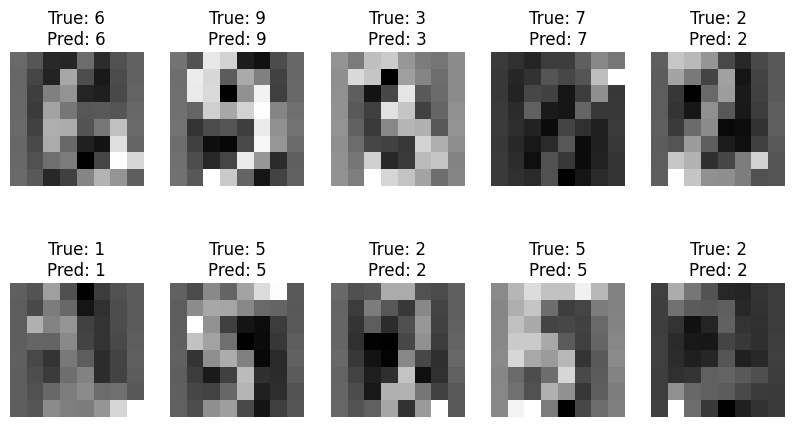

In [12]:
# Plot some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()
